# Sprint 2
## Project Name : Smart Lender - Applicant Credibility Prediction for Loan Approval
### Team ID : PNT2022TMID06350

## Importing The Libraries

In [71]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
import pickle
import warnings
warnings.filterwarnings('ignore')


## Reading The Dataset

In [72]:
df=pd.read_csv('Loan_Prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [73]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [75]:
df.shape

(614, 13)

In [76]:
df=df.drop(columns=["Loan_ID"],axis=1)

## Uni-Variate Analysis

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

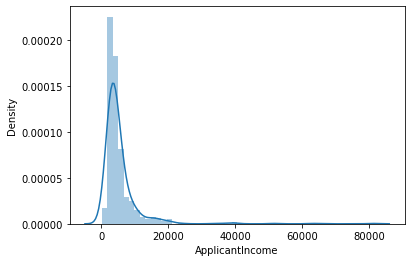

In [77]:
sns.distplot(df.ApplicantIncome)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

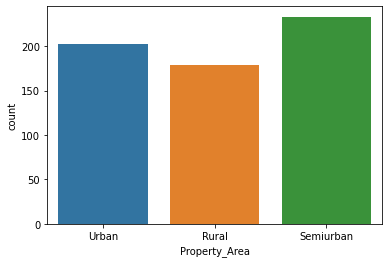

In [78]:
sns.countplot(df.Property_Area)

<AxesSubplot:xlabel='Gender', ylabel='count'>

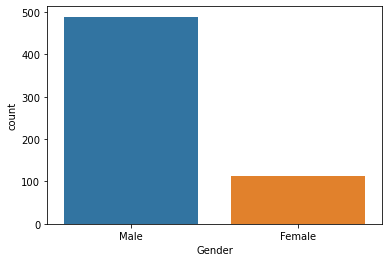

In [79]:
sns.countplot(df.Gender)

<AxesSubplot:xlabel='Education', ylabel='count'>

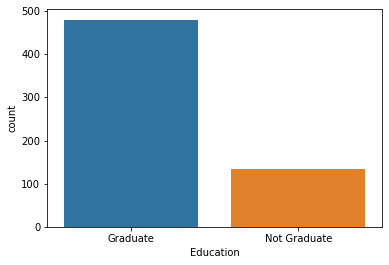

In [80]:
sns.countplot(df.Education)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

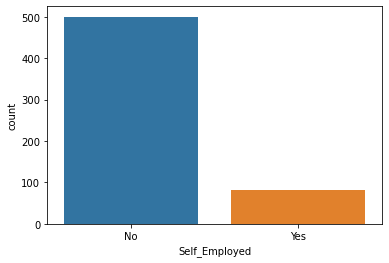

In [81]:
sns.countplot(df.Self_Employed)

<AxesSubplot:xlabel='Married', ylabel='count'>

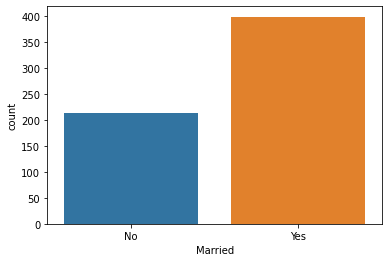

In [82]:
sns.countplot(df.Married)

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

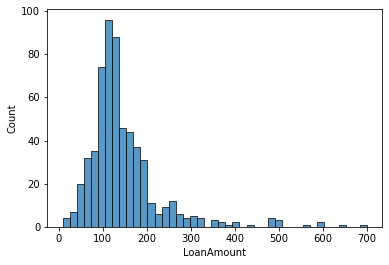

In [83]:
sns.histplot(df.LoanAmount)

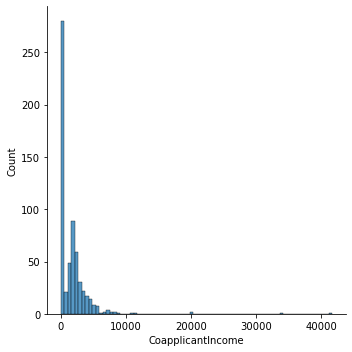

In [84]:
sns.displot(df.CoapplicantIncome)

([<matplotlib.patches.Wedge at 0x1e423fc62e0>,
 [Text(0.40661098511372595, 1.0220897743275028, 'Semi urban'),
  Text(-1.0582795633383781, -0.3000739339235115, 'Urban'),
  Text(0.67000963198199, -0.8724030565348555, 'Rural')])

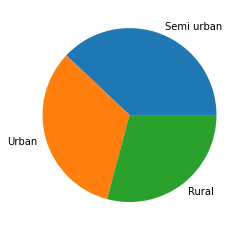

In [85]:
plt.pie(df.Property_Area.value_counts(),[0,0,0],labels=['Semi urban','Urban','Rural'])

In [86]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [87]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

([<matplotlib.patches.Wedge at 0x1e424007cd0>,
 [Text(-0.8514262161117528, 0.6964721089301588, 'Graduate'),
  Text(0.8514262161117524, -0.6964721089301593, 'Not Graduate')])

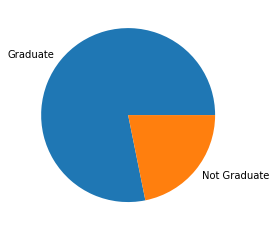

In [88]:
plt.pie(df.Education.value_counts(),[0,0],labels=['Graduate','Not Graduate'])

## Bivariate Analysis

<AxesSubplot:xlabel='Married', ylabel='count'>

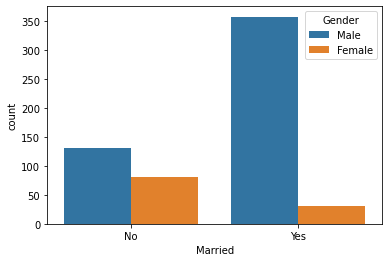

In [89]:
sns.countplot(df['Married'],hue=df['Gender'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='count'>

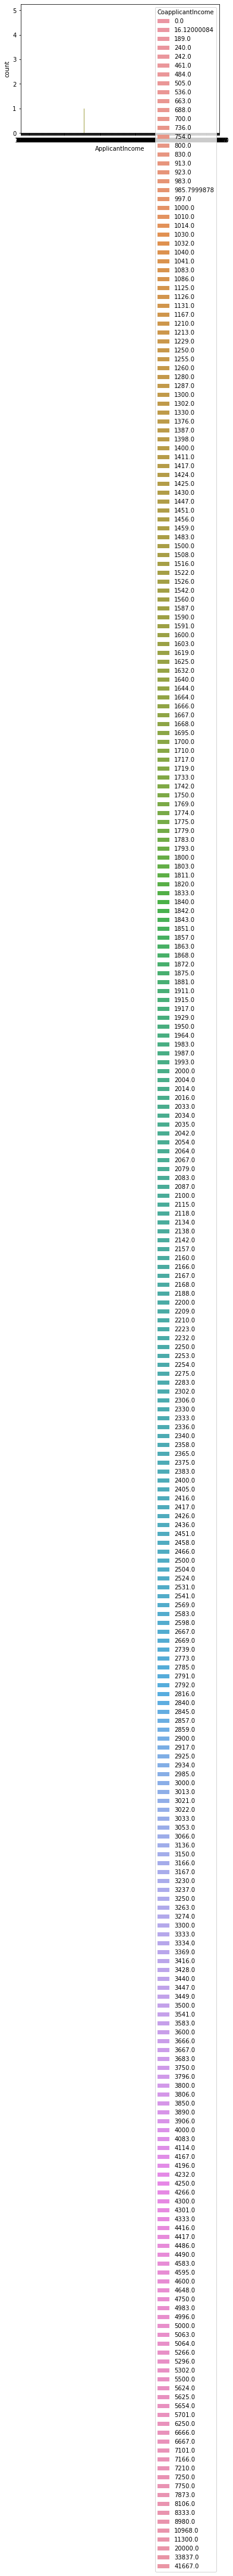

In [90]:
sns.countplot(df['ApplicantIncome'],hue=df['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='count'>

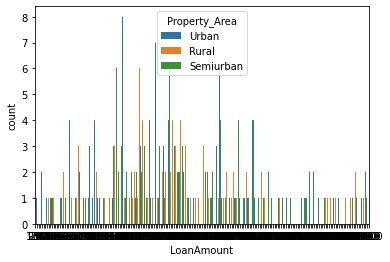

In [91]:
sns.countplot(df['LoanAmount'],hue=df['Property_Area'])

<AxesSubplot:xlabel='LoanAmount', ylabel='count'>

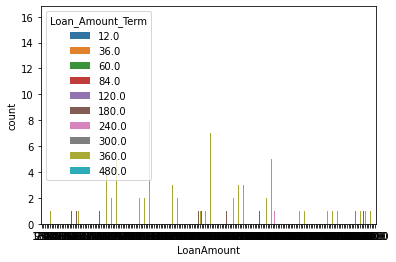

In [92]:
sns.countplot(df['LoanAmount'],hue=df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Education', ylabel='count'>

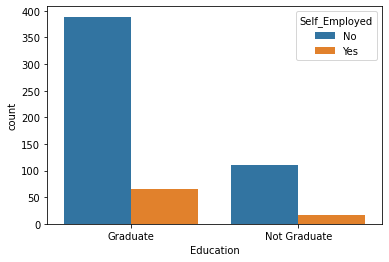

In [93]:
sns.countplot(df['Education'],hue=df['Self_Employed'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

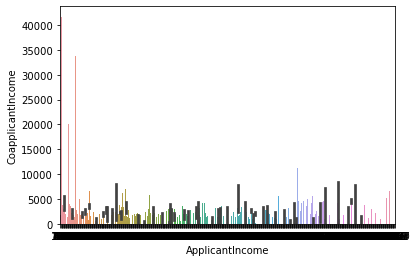

In [94]:
sns.barplot(df.ApplicantIncome,df.CoapplicantIncome)

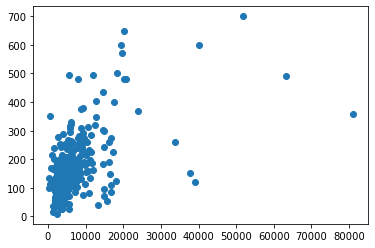

In [95]:
plt.scatter(df.ApplicantIncome,df.LoanAmount)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

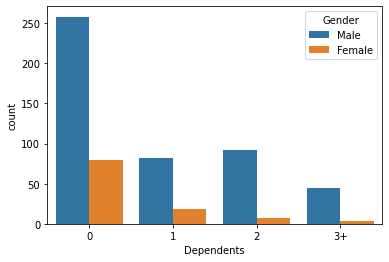

In [96]:
sns.countplot(df['Dependents'],hue=df['Gender'])

## Multi variate Analysis

<AxesSubplot:>

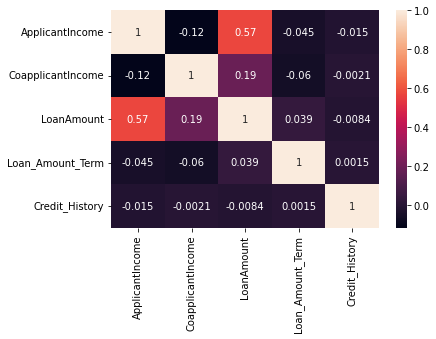

In [97]:
sns.heatmap(df.corr(),annot=True)

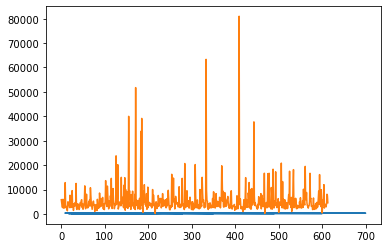

In [98]:
plt.plot(df.LoanAmount,df.Loan_Amount_Term,df.ApplicantIncome)

<AxesSubplot:>

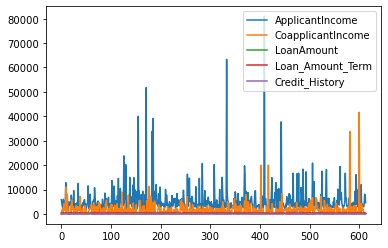

In [99]:
df.plot.line()

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

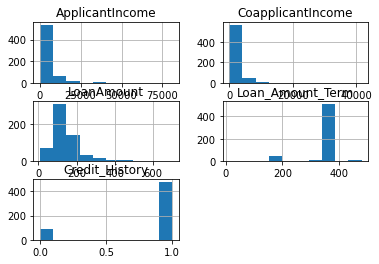

In [100]:
df.hist()

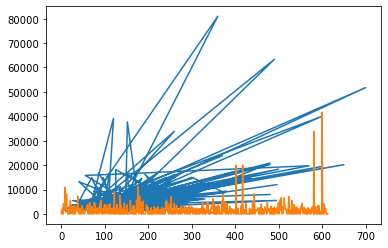

In [101]:
plt.plot(df.LoanAmount,df.ApplicantIncome,df.CoapplicantIncome)

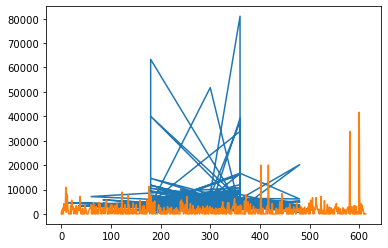

In [102]:
plt.plot(df.Loan_Amount_Term,df.ApplicantIncome,df.CoapplicantIncome)

## Descriptive Analysis¶

In [125]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [126]:
df.mean()

Gender                  0.817590
Married                 0.653094
Dependents              0.744300
Education               0.218241
Self_Employed           0.133550
ApplicantIncome      5403.459283
CoapplicantIncome    1621.245798
LoanAmount            146.412162
Loan_Amount_Term      342.000000
Credit_History          0.842199
Property_Area           1.037459
Loan_Status             0.687296
dtype: float64

In [127]:
df.mode()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,0,0,2500,0.0,146.412162,360.0,1.0,1,1


In [128]:
df.std()

Gender                  0.386497
Married                 0.476373
Dependents              1.009623
Education               0.413389
Self_Employed           0.340446
ApplicantIncome      6109.041673
CoapplicantIncome    2926.248369
LoanAmount             84.037468
Loan_Amount_Term       64.372489
Credit_History          0.349681
Property_Area           0.787482
Loan_Status             0.463973
dtype: float64

In [129]:
df.count()

Gender               614
Married              614
Dependents           614
Education            614
Self_Employed        614
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           614
Loan_Amount_Term     614
Credit_History       614
Property_Area        614
Loan_Status          614
dtype: int64

## Data Pre-Processing

## Check for Null Values

In [130]:
df.isnull().any()

Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [131]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [132]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [133]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [134]:
df.isnull().any()

Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [135]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Handling Categorical Values

In [136]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [137]:
le=LabelEncoder()

In [138]:
df.Gender=le.fit_transform(df.Gender)
df.Married=le.fit_transform(df.Married)
df.Education=le.fit_transform(df.Education)
df.Self_Employed=le.fit_transform(df.Self_Employed)
df.Property_Area=le.fit_transform(df.Property_Area)
df.Loan_Status=le.fit_transform(df.Loan_Status)
df.Dependents=le.fit_transform(df.Dependents)

In [139]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


## Spliting into dependent and independent data

In [140]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [141]:
x=df.iloc[:,:-1]
y=df.Loan_Status

In [142]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [143]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

## Scaling The Data

In [144]:
x_scale=pd.DataFrame(scale(x),columns=x.columns)
x_scale.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.279851,0.45164,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.279851,0.45164,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.279851,0.45164,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.279851,0.45164,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.279851,0.45164,1.223298


## Balancing The Dataset

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

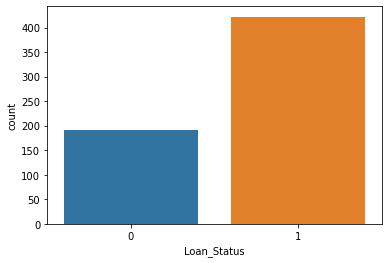

In [145]:
sns.countplot(df.Loan_Status)

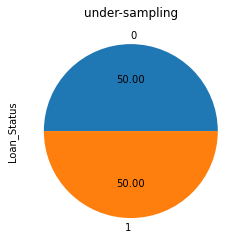

In [146]:
rus=RandomUnderSampler(sampling_strategy=1)
x_res,y_res=rus.fit_resample(x,y)
ax=y_res.value_counts().plot.pie(autopct='%.2f')
_=ax.set_title("under-sampling")

## Splitting Data Into Train and Test

In [147]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10)

In [148]:
xtrain.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
245,1,0,0,0,1,6050,4333.0,120.0,180.0,1.0,2
413,1,1,0,1,0,2253,2033.0,110.0,360.0,1.0,0
126,1,1,3,0,0,23803,0.0,370.0,360.0,1.0,0
531,1,1,3,0,0,4281,0.0,100.0,360.0,1.0,2
188,1,1,0,0,1,674,5296.0,168.0,360.0,1.0,0


In [149]:
xtest.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
285,1,0,0,0,0,3158,3053.0,89.0,360.0,1.000000,0
323,0,0,0,0,0,3166,2985.0,132.0,360.0,0.842199,0
482,1,1,0,0,0,2083,3150.0,128.0,360.0,1.000000,1
173,1,1,0,0,0,5708,5625.0,187.0,360.0,1.000000,1
518,1,0,0,0,0,4683,1915.0,185.0,360.0,1.000000,1


In [150]:
ytrain.head()

245    0
413    1
126    1
531    1
188    1
Name: Loan_Status, dtype: int64

In [151]:
ytest.head()

285    1
323    1
482    1
173    1
518    0
Name: Loan_Status, dtype: int64

In [152]:
xtrain.shape

(429, 11)

In [153]:
xtest.shape

(185, 11)

In [154]:
ytrain.shape

(429,)

In [155]:
ytest.shape

(185,)

## Model Building

## Decision Tree Model

In [156]:
dmodel=DecisionTreeClassifier(random_state=100)

In [157]:
dmodel.fit(x_res,y_res)

DecisionTreeClassifier(random_state=100)

In [158]:
ypredd=dmodel.predict(xtest)

In [159]:
ypred2d=dmodel.predict(xtrain)

## Random Forest Model

In [160]:
Rmodel=RandomForestClassifier(n_estimators=100)

In [161]:
Rmodel.fit(x_res,y_res)

RandomForestClassifier()

In [162]:
ypredR=Rmodel.predict(xtest)

In [163]:
ypred2R=Rmodel.predict(xtrain)

## KNN Model

In [164]:
kmodel=KNeighborsClassifier()

In [165]:
kmodel.fit(x_res,y_res)

KNeighborsClassifier()

In [166]:
ypredk=kmodel.predict(xtest)

In [167]:
ypred2k=kmodel.predict(xtrain)

## Xgboost Model

In [168]:
xmodel=XGBClassifier(eval_metric='mlogloss',n_estimators=100,random_state=100)

In [169]:
xmodel.fit(x_res,y_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [170]:
ypredx=xmodel.predict(xtest)

In [171]:
ypred2x=xmodel.predict(xtrain)

## Compare The Model

In [172]:
print("Decision Tree Model Testing Accuracy")
print(accuracy_score(ytest,ypredd))
print("Decision Tree Model Training Accuracy")
print(accuracy_score(ytrain,ypred2d))

Decision Tree Model Testing Accuracy
0.8648648648648649
Decision Tree Model Training Accuracy
0.8811188811188811


In [173]:
print("Random Forest Model Testing Accuracy")
print(accuracy_score(ytest,ypredR))
print("Random Forest Model Training Accuracy")
print(accuracy_score(ytrain,ypred2R))

Random Forest Model Testing Accuracy
0.9135135135135135
Random Forest Model Training Accuracy
0.9137529137529138


In [174]:
print("KNN Model Testing Accuracy")
print(accuracy_score(ytest,ypredk))
print("KNN Model Training Accuracy")
print(accuracy_score(ytrain,ypred2k))

KNN Model Testing Accuracy
0.6378378378378379
KNN Model Training Accuracy
0.6153846153846154


In [175]:
print("Xgboost Model Testing Accuracy")
print(accuracy_score(ytest,ypredx))
print("Xgboost Model Training Accuracy")
print(accuracy_score(ytrain,ypred2x))

Xgboost Model Testing Accuracy
0.918918918918919
Xgboost Model Training Accuracy
0.8741258741258742


## Evaluating Performance Of The Model And Saving The Model

### Random Forest Model is Selected

In [176]:
print("Random Forest Model Testing Accuracy")
print(accuracy_score(ytest,ypredR))
print("Random Forest Model Training Accuracy")
print(accuracy_score(ytrain,ypred2R))

Random Forest Model Testing Accuracy
0.9135135135135135
Random Forest Model Training Accuracy
0.9137529137529138


In [177]:
f1_score(ypredR,ytest,average='weighted')

0.9105153153153154

In [178]:
pd.crosstab(ytest,ypredR)

col_0,0,1
Loan_Status,,
0,52,0
1,16,117


In [179]:
print(confusion_matrix(ytest,ypredR))

[[ 52   0]
 [ 16 117]]


In [180]:
print(classification_report(ytest,ypredR))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87        52
           1       1.00      0.88      0.94       133

    accuracy                           0.91       185
   macro avg       0.88      0.94      0.90       185
weighted avg       0.93      0.91      0.92       185



## Saving The Model

In [186]:
#pickle.dump(Rmodel, 'Rmodel.pkl')
#pickle.dump(obj, Rmodel, protocol=None, *, fix_imports=True)
pickle.dump(Rmodel, open('Rmodel.pkl', 'wb'))

In [187]:
pickle.dump(x_scale,open('scale.pkl','wb'))

In [191]:
pickle.dump(x_scale,open('Rmodel.pkl','wb'))

In [196]:
import pickle
with open('Rmodel.pkl', 'wb') as files:
    pickle.dump(x_res, files)

In [197]:
with open('Rmodel.pkl', 'wb') as files:
    pickle.dump(y_res, files)